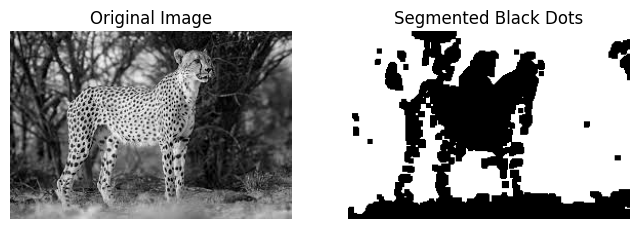

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Define U-Net Model
def build_unet(input_shape=(128, 128, 1)):  # Grayscale input
    inputs = keras.Input(shape=input_shape)

    # Encoder
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Bottleneck
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)

    # Decoder
    x = layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), activation='relu', padding='same')(x)
    x = layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), activation='relu', padding='same')(x)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(x)  # Binary mask output

    model = keras.Model(inputs, outputs)
    return model

# Create and Compile Model
model = build_unet()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Function to Predict Segmentation Mask
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_black_dots(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(img, (5, 5), 0)

    # Apply Otsu's Thresholding to segment black dots
    _, binary_mask = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Apply Morphological Closing (Dilation followed by Erosion) to remove small artifacts
    kernel = np.ones((3, 3), np.uint8)
    binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Display the Original Image and Segmentation Result
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(img, cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(binary_mask, cmap='gray')
    axes[1].set_title("Segmented Black Dots")
    axes[1].axis("off")

    plt.show()

# Run the segmentation on the uploaded image
image_path = "/content/cheetah.jpg"
segment_black_dots(image_path)


